In [1]:
#pip install imbalanced-learn
#pip install -U sklearn 
#pip install -U imblearn

In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import pyarrow.parquet as pq
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from socket import gethostname
import dask.dataframe as dd
from time import sleep
import sweetviz as sv
#import dask_memusage
#import sklearn
pd.set_option('display.max_columns', None)
from category_encoders import MEstimateEncoder
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [32]:
path = "F:\Study\GeorgiaTech\Practicum\data\output" 
report_path = r"F:\Study\GeorgiaTech\Practicum\data\Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx"
#path = r"rC:\Users\kk_kr\Downloads" 
onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) if 'flag_defects' in f]
display(onlyfiles)

['flag_defects_usingSalesOrder.csv', 'flag_defects_usingSalesOrder_Item.csv']

In [33]:
df_salesOrderItem = pd.read_csv(path + "//flag_defects_usingSalesOrder_Item.csv")
#df_salesOrder = pd.read_csv(path + "//flag_defects_usingSalesOrder.csv")
report_data = pd.read_excel(report_path)

In [34]:
report_data.columns

Index(['Dealer Name', 'Sales Order', 'SR#', 'Customer Calculation',
       'Sales Order item', 'Reporting Plant ', 'Replacement SO',
       'Value Stream / Vendor', 'Quality Treatment', 'Cause Code Concat ',
       ...
       'Work Center/Resource', 'Workcenter Text', 'Zparcmatl___T',
       'Zsalesdoc__Zasdarea___T', 'Zsalesdoc__Zavparea___T', 'Days to Ship',
       'FedEx Defect Qty', 'FedEx DPPM', 'FedEx Pieces Shipped',
       'Net Value of Order Item'],
      dtype='object', length=105)

In [35]:
report_data = report_data[report_data['Cause Code Concat '].isin(['1250 - Missing','1150 - Wrong Style','1151 - Wrong Finish'])]

In [36]:
#Create df from Defects data with unique Sales Orders + Sales Order Item
report_uniqueSalesOrder_Item = report_data.drop_duplicates(subset=['Sales Order','Sales Order item'],keep="last")\
                                    [['Sales Order','Sales Order item']]

#Add a defect Flag to this df
report_uniqueSalesOrder_Item = report_uniqueSalesOrder_Item.assign(defectFlag=1)

In [37]:
flag_defects_usingSalesOrder_Item = df_salesOrderItem.merge(report_uniqueSalesOrder_Item[['Sales Order', \
                                                'Sales Order item','defectFlag']], \
                                on=['Sales Order','Sales Order item'],how="left")

In [38]:
flag_defects_usingSalesOrder_Item.head()
flag_defects_usingSalesOrder_Item['defectFlag_y'] = flag_defects_usingSalesOrder_Item['defectFlag_y'].fillna(0)

flag_defects_usingSalesOrder_Item = flag_defects_usingSalesOrder_Item\
                                    .drop(columns='defectFlag_x')\
                                    .rename(columns={'defectFlag_y':'defectFlag'})

In [39]:
flag_defects_usingSalesOrder_Item.head()

flag_defects_usingSalesOrder_Item.groupby('defectFlag').count()

,Unnamed: 0,4ZSD_AD06_VBELN,4ZSD_AD06_POSNR,4ZSD_AD06_UEPOS,0PLANT,0PLANT___T,0UPD_DATE,4ZSD_AD06_ERDAT,4ZSD_AD06_GEWEI,4ZSD_AD06_GEWEI___T,4ZSD_AD06_GRKOR,4ZSD_AD06_GSBER,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_MATKL,4ZSD_AD06_MATNR,4ZSD_AD06_MFRGR,4ZSD_AD06_PRCTR,4ZSD_AD06_PSTYV,4ZSD_AD06_ROUTE,4ZSD_AD06_STKEY,4ZSD_AD06_STLNR,4ZSD_AD06_STLTY,4ZSD_AD06_VOLEH,4ZSD_AD06_VOLEH___T,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONF_DELV,4ZSD_AD06_ZZCONF_MAD,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZCUSTREQDATE,4ZSD_AD06_ZZLINEPACKAGE,4ZSD_AD06_ZZMPBLDDATE,4ZSD_AD06_ZZORGDLRDLVYDATE,4ZSD_AD06_ZZPACKVORSCHR,4ZSD_AD06_ZZPRCQTE,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_BRGEW,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,Value Stream,Act Ship Com Dt,Reporting Plant,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Material (Parcel),Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code
defectFlag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,1162282,2121384,2121384,2121384,2121384,2121384,2121384,2121383,1939393,1667073,2121313,2121384,2121384,2121384,2121324,2121384,2121384,1889659,2121384,2121384,2121384,2121384,2121351,2090843,79730,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2121384,2089347,2089347,2089347,2089347
1.0,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1077,1822,1822,1822,1822,1822,1822,1822,1729,1055,1822,1822,1822,1822,1822,1822,1822,1664,1822,1822,1822,1822,1822,1781,88,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822


In [40]:
del df_salesOrderItem
df_salesOrderItem = flag_defects_usingSalesOrder_Item.copy()

In [41]:
#Write these files to csv or parquet
#outPath = r'F:\Study\GeorgiaTech\Practicum\data\Output'
#flag_defects_usingSalesOrder.to_csv(outPath+'\\flag_defects_usingSalesOrder.csv')
#flag_defects_usingSalesOrder_Item.to_csv(outPath+'\\flag_defects_usingSalesOrder_Item.csv')

In [42]:
#df_salesOrderItem.shape, df_salesOrder.shape

In [43]:
#df_salesOrder.columns

In [44]:
# df_salesOrder = df_salesOrder.drop(columns = [
# '0UPD_DATE',
# '4ZSD_AD06_GEWEI',
# '4ZSD_AD06_GEWEI___T',
# '4ZSD_AD06_GRKOR',
# '4ZSD_AD06_GSBER',
# '4ZSD_AD06_MFRGR',
# '4ZSD_AD06_PRCTR',
# '4ZSD_AD06_PSTYV',
# '4ZSD_AD06_STKEY',
# '4ZSD_AD06_STLNR',
# '4ZSD_AD06_STLTY',
# '4ZSD_AD06_ZZLINEPACKAGE',
# '4ZSD_AD06_ZZMPBLDDATE',
# '4ZSD_AD06_ZZORGDLRDLVYDATE',
# '4ZSD_AD06_ZZPRCQTE'])
df_salesOrderItem = df_salesOrderItem.drop(columns = [
'0UPD_DATE',
'4ZSD_AD06_GEWEI',
'4ZSD_AD06_GEWEI___T',
'4ZSD_AD06_GRKOR',
'4ZSD_AD06_GSBER',
'4ZSD_AD06_MFRGR',
'4ZSD_AD06_PRCTR',
'4ZSD_AD06_PSTYV',
'4ZSD_AD06_STKEY',
'4ZSD_AD06_STLNR',
'4ZSD_AD06_STLTY',
'4ZSD_AD06_ZZLINEPACKAGE',
'4ZSD_AD06_ZZMPBLDDATE',
'4ZSD_AD06_ZZORGDLRDLVYDATE',
'4ZSD_AD06_ZZPRCQTE'])

In [45]:
df_modelInput = df_salesOrderItem.drop( \
                                      columns = ['Unnamed: 0',\
                                                 '0PLANT___T', \
                                                 '4ZSD_AD06_VBELN',\
                                                 '4ZSD_AD06_POSNR',\
                                                 '4ZSD_AD06_UEPOS',\
                                                 '0PLANT',\
                                                 '4ZSD_AD06_ERDAT',\
                                                 '4ZSD_AD06_MATKL',\
                                                 '4ZSD_AD06_MATNR',\
                                                 '4ZSD_AD06_VOLEH',\
                                                 '4ZSD_AD06_VOLEH___T',\
                                                 '4ZSD_AD06_ZZCONF_DELV',\
                                                 '4ZSD_AD06_ZZCONF_MAD',\
                                                 '4ZSD_AD06_ZZCUSTREQDATE',\
                                                 '4ZSD_AD06_BRGEW',\
                                                 'Material (Parcel)',\
                                                 'Reporting Plant',\
                                                 '4ZSD_AD06_ZZPACKVORSCHR',\
                                                 #'Sales Order',\ -- To tie back to df from modelInput
                                                 #'Sales Order item',\ -- To tie back to df from modelInput
                                                 'Act Ship Com Dt' \
                                                ])

df_modelInput['4ZSD_AD06_KONDM'] = df_modelInput['4ZSD_AD06_KONDM'].fillna(0)


In [46]:
df_modelInput = df_modelInput[df_modelInput['Value Stream']=='Components'].drop(columns = ['Value Stream'])
#df_modelInput = df_modelInput.drop(columns = ['Material (Parcel)'])

In [47]:
df_salesOrderItem_Components = df_salesOrderItem[df_salesOrderItem['Value Stream']=='Components']

In [48]:
#This flag indicates whether its a special order or not 
df_modelInput['4ZSD_AD06_ZZTUSPCLIND'] = df_modelInput['4ZSD_AD06_ZZTUSPCLIND'].fillna(0)

In [49]:
df_modelInput[df_modelInput['4ZSD_AD06_ZZTUSPCLIND']!=0].groupby('defectFlag').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code
defectFlag,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,4553,4553,4553,4553,4550,4493,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4553,4512,4512,4512,4512
1.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [50]:
#Replace all NA with 0
df_modelInput = df_modelInput.fillna(0)

In [51]:
#Replace X to 1. 
df_modelInput['4ZSD_AD06_ZZTUSPCLIND'].replace('X',1,inplace=True)

In [52]:
df_modelInput.groupby('4ZSD_AD06_ZZTUSPCLIND').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag
4ZSD_AD06_ZZTUSPCLIND,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312
1,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570


## Trying target encoding where it makes sense

### Categorical columns
* Below 2 have only 2 categories, so encoding them as 0 vs 1 
    * 4ZSD_AD06_ZZCARTIND
    * Order Shipment Code

* 4ZSD_AD06_LPRIO

                                             |                                             | [  0%]   00:00 ->…

TypeError: 

Column [4ZSD_AD06_ZZCARTIND] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [4ZSD_AD06_ZZCARTIND] only contains a certain type of data (numerical OR string).
OR -> Convert series [4ZSD_AD06_ZZCARTIND] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['4ZSD_AD06_ZZCARTIND'] = df['4ZSD_AD06_ZZCARTIND'].astype(str)
OR -> Convert series [4ZSD_AD06_ZZCARTIND] to a numerical value (if makes sense):
     One way to do this is:
     df['4ZSD_AD06_ZZCARTIND'] = pd.to_numeric(df['4ZSD_AD06_ZZCARTIND'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


In [58]:
f = lambda x: 0 if x =='C' else 1
df_modelInput['4ZSD_AD06_ZZCARTIND'] = df_modelInput['4ZSD_AD06_ZZCARTIND'].map(f)

In [59]:
g = lambda x: 0 if x =='Cust Dlvy' else 1
df_modelInput['Order Shipment Code'] = df_modelInput['Order Shipment Code'].map(g)
df_modelInput.groupby('Order Shipment Code').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,defectFlag
Order Shipment Code,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882,718882


In [60]:
#Analyze the input now 
excludeCols = []
defects_report = sv.analyze(df_modelInput[df_modelInput.columns[~df_modelInput.columns.isin(excludeCols)]])


defects_report.show_html('EDA.html')

                                             |                                             | [  0%]   00:00 ->…

TypeError: 

Column [4ZSD_AD06_ZZCONPATH] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [4ZSD_AD06_ZZCONPATH] only contains a certain type of data (numerical OR string).
OR -> Convert series [4ZSD_AD06_ZZCONPATH] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['4ZSD_AD06_ZZCONPATH'] = df['4ZSD_AD06_ZZCONPATH'].astype(str)
OR -> Convert series [4ZSD_AD06_ZZCONPATH] to a numerical value (if makes sense):
     One way to do this is:
     df['4ZSD_AD06_ZZCONPATH'] = pd.to_numeric(df['4ZSD_AD06_ZZCONPATH'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


In [ ]:
#h = lambda x: 'O' if x in ('')

In [61]:
#Changing datatype to category
df_modelInput['Order Shipment Code'] = df_modelInput['Order Shipment Code'].astype('category')
df_modelInput['4ZSD_AD06_ZZCARTIND'] = df_modelInput['4ZSD_AD06_ZZCARTIND'].astype('category')
#df_modelInput['4ZSD_AD06_LPRIO'] = df_modelInput['4ZSD_AD06_LPRIO'].astype('category')
df_modelInput['4ZSD_AD06_VSTEL'] = df_modelInput['4ZSD_AD06_VSTEL'].astype('category')
df_modelInput['4ZSD_AD06_ZZCONPATH'] = df_modelInput['4ZSD_AD06_ZZCONPATH'].astype('category')
df_modelInput['PCC'] = df_modelInput['PCC'].astype('category')
df_modelInput['Product Line'] = df_modelInput['Product Line'].astype('category')
df_modelInput['GM Category'] = df_modelInput['GM Category'].astype('category')
df_modelInput['Op Prod Category'] = df_modelInput['Op Prod Category'].astype('category')
df_modelInput['Product Sub-Cat'] = df_modelInput['Product Sub-Cat'].astype('category')
df_modelInput['PL Category'] = df_modelInput['PL Category'].astype('category')
df_modelInput['Unnamed: 12'] = df_modelInput['Unnamed: 12'].astype('category')
df_modelInput['Work Center'] = df_modelInput['Work Center'].astype('category')
df_modelInput['Shipping type'] = df_modelInput['Shipping type'].astype('category')

In [62]:
df_modelInput = pd.get_dummies(df_modelInput,columns=['4ZSD_AD06_KONDM'],prefix='4ZSD_AD06_KONDM')

In [63]:
df_modelInput.head(10)

,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag,4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0
2,50,TS02,GM00,1,AA2GM,0,1.0,0.035,0.999,2.224,4.535,7507558,2280,1,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"PKG- TRIM, T, THIN, 54 - NO HDWR",ANSWER CARTON TRIM,1.0,2020-05-29,FTL (Full Trk Load),1,0.0,1,0,0,0
6,50,TS07,GM00,1,AA2GM,0,12.0,8.460,11.988,1.864,10.860,7633395,2150,12,ANSWER PANEL FRAMES,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"PKG - HORIZONTAL BEAM, 48 (QTY ONE)",BLACK LINE (VAR - PREVIOUSLY RFC),12.0,2020-06-18,FTL (Full Trk Load),1,0.0,0,1,0,0
11,50,TS01,EP00,1,AA2EP,0,1.0,4.790,0.999,2.970,8.890,7688365,1360,1,ANSWER PANEL FULL,Answer,Furniture,Panel,Systems,Panels,"PACKAGE - TRIM, BASE, 60",ANSWER CARTON TRIM,1.0,2020-07-18,FTL (Full Trk Load),1,0.0,0,1,0,0
14,50,TS01,GM00,1,AA2GM,0,4.0,0.152,3.996,0.081,0.402,7712293,7840,4,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"ALIGNER PKG - TOP CAP, INLINE, THIN",ANSWER FINAL,4.0,2020-10-16,FTL (Full Trk Load),1,0.0,1,0,0,0
17,50,TS01,EP00,1,AA2EP,0,6.0,46.080,0.600,1.928,48.080,7726063,840,6,"Storage, Answer Bins",Answer,Furniture,Storage - Overhead,Systems,Personal Storage,"PACK - SUPPORT, WALL CHANNEL",ANSWER CARTON TRIM,6.0,2020-03-16,FTL (Full Trk Load),1,0.0,0,1,0,0
20,50,TS02,GM00,1,AA2GM,0,32.0,523.296,31.968,32.000,539.296,7729428,7410,32,Answer Markerboard Skins,Answer,Furniture,Panel - Skins/Tiles,Systems,Panels,"Skin-markerboard, 24x48",ANSWER PAN FINAL,32.0,2020-06-12,FTL (Full Trk Load),1,0.0,0,1,0,0
22,50,TS01,CC00,1,AA2CC,0,2.0,1.154,1.998,0.502,1.854,7732999,390,2,ANSWER PANEL FULL,Answer,Furniture,Panel,Systems,Panels,"PACKAGE - BASE CABLE TRAY, 30",BLACK LINE (VAR - PREVIOUSLY RFC),2.0,2020-04-10,FTL (Full Trk Load),1,0.0,0,1,0,0
25,50,TS01,NG00,1,AA2NG,0,3.0,1.170,1.839,2.461,3.870,7750785,550,3,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"JUNCTION ASSY - CHG OF HGT, L, 48X66",BLACK LINE (VAR - PREVIOUSLY RFC),3.0,2020-03-19,FTL (Full Trk Load),1,0.0,0,1,0,0
32,50,TS02,GM00,1,AA2GM,0,154.0,257.950,0.308,17.780,282.450,7768466,860,154,ANSWER PANEL FRAMES,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"CAP - TOP ASSY, THIN, 36(35.96)",ANSWER CARTON TRIM,154.0,2020-05-14,FTL (Full Trk Load),1,0.0,1,0,0,0
34,50,TS01,GM00,1,AA2GM,0,80.0,56.400,79.920,20.936,66.200,7768952,180,80,Answer Fence Structure,Answer Fence,Furniture,Panel - Structure/Trim,Systems,Non-Panel Based Systems,"PKG - HORIZONTAL BEAM, 72 (QTY ONE)",BLACK LINE (VAR - PREVIOUSLY RFC),80.0,2020-03-06,FTL (Full Trk Load),1,0.0,0,1,0,0


In [64]:
df_modelInput.groupby('defectFlag').count()

,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0
defectFlag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158,718158
1.0,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724


In [65]:
1460/717422

0.0020350644390609712

In [66]:
#mEstimate for fields 
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_LPRIO_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_LPRIO'],df_modelInput['defectFlag'])

In [67]:
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_VSTEL_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_VSTEL'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_ZZCONPATH_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_ZZCONPATH'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['PCC_mEnc'] = mEstimator.fit_transform(df_modelInput['PCC'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Product Line_mEnc'] = mEstimator.fit_transform(df_modelInput['Product Line'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['GM Category_mEnc'] = mEstimator.fit_transform(df_modelInput['GM Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Op Prod Category_mEnc'] = mEstimator.fit_transform(df_modelInput['Op Prod Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Product Sub-Cat_mEnc'] = mEstimator.fit_transform(df_modelInput['Product Sub-Cat'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['PL Category_mEnc'] = mEstimator.fit_transform(df_modelInput['PL Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Unnamed: 12_mEnc'] = mEstimator.fit_transform(df_modelInput['Unnamed: 12'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Work Center_mEnc'] = mEstimator.fit_transform(df_modelInput['Work Center'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Shipping type_mEnc'] = mEstimator.fit_transform(df_modelInput['Shipping type'],df_modelInput['defectFlag'])

In [68]:
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_ROUTE_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_ROUTE'],df_modelInput['defectFlag'])

In [69]:
df_modelInput= df_modelInput.drop(columns=['4ZSD_AD06_VSTEL'
,'4ZSD_AD06_ZZCONPATH'
,'PCC'
,'Product Line'
,'GM Category'
,'Op Prod Category'
,'Product Sub-Cat'
,'PL Category'
,'Unnamed: 12'
,'Work Center'
,'Shipping type'])

In [70]:
df_modelInput = df_modelInput.drop(columns=['4ZSD_AD06_ROUTE'])

In [71]:
df_modelInput_withoutKeys = df_modelInput.drop(columns = ['Calendar Day','Sales Order','Sales Order item'])

In [72]:
#Separate out features and label
df_modelInput_withoutKeys_X = df_modelInput_withoutKeys.loc[:, ~df_modelInput_withoutKeys.columns.isin(['defectFlag'])]
df_modelInput_withoutKeys_y = df_modelInput_withoutKeys.loc[:, df_modelInput_withoutKeys.columns.isin(['defectFlag'])]

In [73]:
df_modelInput_withoutKeys_X.columns

Index(['4ZSD_AD06_LPRIO', '4ZSD_AD06_ZZCARTIND', '4ZSD_AD06_ZZTUSPCLIND',
       '4ZSD_AD06_KBMENG', '4ZSD_AD06_NTGEW', '4ZSD_AD06_VOLUM',
       '4ZSD_AD06_ZZLINEVOLUME', '4ZSD_AD06_ZZLINEWEIGHT', 'Pieces Shipped_x',
       'Pieces Shipped (ALL)', 'Order Shipment Code', '4ZSD_AD06_KONDM_0.0',
       '4ZSD_AD06_KONDM_1.0', '4ZSD_AD06_KONDM_3.0', '4ZSD_AD06_KONDM_4.0',
       '4ZSD_AD06_LPRIO_mEnc', '4ZSD_AD06_VSTEL_mEnc',
       '4ZSD_AD06_ZZCONPATH_mEnc', 'PCC_mEnc', 'Product Line_mEnc',
       'GM Category_mEnc', 'Op Prod Category_mEnc', 'Product Sub-Cat_mEnc',
       'PL Category_mEnc', 'Unnamed: 12_mEnc', 'Work Center_mEnc',
       'Shipping type_mEnc', '4ZSD_AD06_ROUTE_mEnc'],
      dtype='object')

In [74]:
numericCols = [i for i in df_modelInput_withoutKeys_X.columns if i not in ('4ZSD_AD06_ZZCARTIND',\
                                                                 '4ZSD_AD06_KONDM_0.0',\
                                                                 '4ZSD_AD06_KONDM_1.0',\
                                                                 '4ZSD_AD06_KONDM_3.0',\
                                                                 '4ZSD_AD06_KONDM_4.0',\
                                                                 'Order Shipment Code'
                                                                )] 

In [75]:
#Standardizing
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
for i in numericCols:
    scale = StandardScaler().fit(df_modelInput_withoutKeys_X[[i]])
    
    df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])

<ipython-input-75-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])
<ipython-input-75-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])
<ipython-input-75-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [76]:
df_modelInput_withoutKeys_X.describe()

,4ZSD_AD06_LPRIO,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Pieces Shipped_x,Pieces Shipped (ALL),4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0,4ZSD_AD06_LPRIO_mEnc,4ZSD_AD06_VSTEL_mEnc,4ZSD_AD06_ZZCONPATH_mEnc,PCC_mEnc,Product Line_mEnc,GM Category_mEnc,Op Prod Category_mEnc,Product Sub-Cat_mEnc,PL Category_mEnc,Unnamed: 12_mEnc,Work Center_mEnc,Shipping type_mEnc,4ZSD_AD06_ROUTE_mEnc
count,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,718882.000000,718882.000000,718882.000000,718882.000000,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05
mean,-1.319711e-16,3.117413e-17,-5.535038e-19,1.704199e-16,-1.986683e-17,4.806093e-17,5.578528e-17,-3.174740e-17,-1.049680e-17,0.492049,0.506880,0.000278,0.000793,-1.319711e-16,2.034799e-15,-1.072878e-15,-3.010270e-16,-2.140478e-16,-1.427249e-17,-7.084849e-17,-1.196952e-16,-2.609177e-16,-3.236021e-17,2.273319e-17,8.531075e-16,3.875317e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.499937,0.499953,0.016677,0.028147,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.428979e+00,-7.998603e-02,-3.199739e-01,-2.416649e-01,-2.882768e-01,-1.968970e-01,-2.523393e-01,-3.199714e-01,-3.560024e-01,0.000000,0.000000,0.000000,0.000000,-5.428979e+00,-5.042488e+00,-1.460263e+00,-4.871346e-01,-8.450149e-01,-1.710653e+00,-6.733999e-01,-1.249399e+00,-1.231015e+00,-2.482168e-01,-5.998823e-01,-4.659571e+00,-5.232523e+00
25%,2.348412e-01,-7.998603e-02,-2.835761e-01,-2.291346e-01,-2.782944e-01,-1.654123e-01,-2.283907e-01,-2.835735e-01,-3.190767e-01,0.000000,0.000000,0.000000,0.000000,2.348412e-01,-9.732002e-01,-1.009962e+00,-3.369228e-01,-2.743010e-01,-1.051517e-01,-3.961613e-01,-1.130661e-01,-1.082424e-01,-2.480536e-01,-5.497538e-01,-6.115999e-03,-7.904794e-02
50%,2.348412e-01,-7.998603e-02,-2.471784e-01,-1.957204e-01,-2.281317e-01,-1.352395e-01,-1.946232e-01,-2.471756e-01,-2.452254e-01,0.000000,1.000000,0.000000,0.000000,2.348412e-01,-1.333752e-01,-1.430145e-01,-2.965673e-01,-2.743010e-01,-1.051517e-01,-3.961613e-01,-1.130661e-01,-1.082424e-01,-2.321491e-01,-1.466923e-01,-6.115999e-03,-7.904794e-02
75%,2.348412e-01,-7.998603e-02,-6.518957e-02,-8.601917e-02,-8.787663e-02,-3.952212e-02,-8.656732e-02,-6.518611e-02,-6.059722e-02,1.000000,1.000000,0.000000,0.000000,2.348412e-01,5.779574e-01,5.946101e-01,-1.928511e-01,-2.743010e-01,-1.051517e-01,-1.904987e-01,-1.130661e-01,-1.082424e-01,-9.706830e-02,-1.466923e-01,-6.115999e-03,2.471894e-01
max,5.783073e+00,1.250218e+01,1.270358e+02,1.862467e+02,1.574661e+02,1.831236e+02,1.902452e+02,1.270363e+02,1.288838e+02,1.000000,1.000000,1.000000,1.000000,5.783073e+00,1.135745e+01,1.787290e+00,2.979133e+01,1.261237e+01,1.220526e+01,6.960768e+00,1.500124e+01,1.232461e+01,1.240151e+02,1.083064e+01,3.706774e+01,1.967104e+01


In [77]:
np.array(df_modelInput_withoutKeys_y)
np.array(df_modelInput_withoutKeys_X)

array([[0.23484118875993473, 1, -0.07998602729392248, ...,
        -0.14669228340039248, -0.006115999452635142, 0.24718939928154024],
       [0.23484118875993473, 1, -0.07998602729392248, ...,
        -0.5497538013925188, -0.006115999452635142, 2.3619924578362346],
       [0.23484118875993473, 1, -0.07998602729392248, ...,
        -0.14669228340039248, -0.006115999452635142,
        -0.07904794281913184],
       ...,
       [0.23484118875993473, 1, -0.07998602729392248, ...,
        -0.14669228340039248, -4.65957130985121, -0.07904794281913184],
       [-4.735449904774339, 1, -0.07998602729392248, ...,
        -0.14669228340039248, -0.006115999452635142,
        -0.07904794281913184],
       [0.23484118875993473, 1, -0.07998602729392248, ...,
        -0.5497538013925188, -0.006115999452635142, -0.07904794281913184]],
      dtype=object)

In [78]:
#X.shape, df_modelInput_withoutKeys_X.shape

NameError: name 'X' is not defined

### Try upsampling of data using SMOTE

In [87]:
X = np.array(df_modelInput_withoutKeys_X)
y = np.array(df_modelInput_withoutKeys_y)
print ("BEFORE:")
print(X.shape,y.shape)

#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

oversample = SMOTE(sampling_strategy=0.75) #Takes all minority class and tries to upsample - Check link above
#oversample = SMOTE(sampling_strategy = 0.1) #Takes 10% of minority class and tries to upsample

X, y = oversample.fit_resample(X, y)

print ("AFTER:")
print(X.shape,y.shape)

BEFORE:
(718882, 28) (718882, 1)
AFTER:
(1256776, 28) (1256776,)


### Split into training and test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75,test_size=0.25,random_state = 22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(942582, 28) (314194, 28) (942582,) (314194,)


### Logistic Regression

In [89]:
clf = LogisticRegression(random_state=22,max_iter=200).fit(X_train,y_train)

In [90]:
clf.predict_proba(X_test)

array([[8.54446961e-01, 1.45553039e-01],
       [8.23041697e-01, 1.76958303e-01],
       [8.44129991e-01, 1.55870009e-01],
       ...,
       [9.97928262e-09, 9.99999990e-01],
       [7.97106689e-01, 2.02893311e-01],
       [1.31162487e-06, 9.99998688e-01]])

In [91]:
score = clf.score(X_test,y_test)
score

0.8323201588827285

In [92]:
predictions = clf.predict(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.906


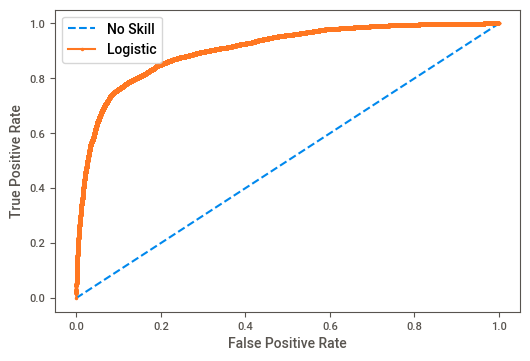

In [93]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [94]:
cm = metrics.confusion_matrix(y_test,predictions)

print(cm)

[[167706  11878]
 [ 40806  93804]]


### Naive Bayes

In [95]:
nb = GaussianNB().fit(X_train,y_train)

In [96]:
nbpredictions = nb.predict(X_test)

In [97]:
cm = metrics.confusion_matrix(y_test,nbpredictions)
print(cm)

[[162380  17204]
 [ 55006  79604]]


In [98]:
print(nb.score(X_test,y_test))

0.770173841639242


In [116]:
nb.predict_proba(X_test)

FloatingPointError: underflow encountered in exp

In [115]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

FloatingPointError: underflow encountered in exp